# Celestial navigation with iLQR
This example shows model predictive control to move a spacecraft from earth to the moon using celestial dynamics.

![Celestial navigation with iLQR](./navigator.gif)

## Problem

**Model.** Celestial dynamics are governed by the n-body equation

$$
\frac{d^2 q_i}{dt^2} = \sum_{j=1, j \neq i} \frac{G m_j (q_j - q_i)}{\| q_j - q_i \|^3}
$$
where $m_i, m_j$ are masses of objects, $q_i, q_j$ are position vectors of objects and $G$ is the gravitational constant. The dynamics of the system are governed by this equation for *i={Earth, Moon, Craft}*.  Because the effect of other masses on the sun is negligible, we make a simplifcation that $\ddot{q}_{earth} = \dot{q}_{earth} = 0$, which reduces the state dimension by 4.

**Control.** The goal is for the craft to be taken from a trajectory near the Earth to the Moon.  We can define the cost function as a quadratic error between the state of Mars and the state of the craft.  Applied over the entire control horizon, this will try to align the trajectories of the bodies.

$$
J = \sum_{i=1}^{N} x_i^\top Q x_i + \sum_{i=1}^{N-1} u_i^\top R u_i
$$

In order for the craft to track the moon, we define the following quadratic error between craft and moon positions and velocities
$$
\min ~(q_c - q_m)^\top (q_c - q_m) + (\dot{q}_c - \dot{q}_m)^\top (\dot{q}_c - \dot{q}_m)
$$
Given the state vector is $x = (q_m, q_c, \dot{q}_m, \dot{q}_c)^\top$, this allows us to write $Q$ in terms of the 2x2 identity matrix $I$
$$
Q = \begin{bmatrix}
 I & -I & 0 & 0 \\
-I & I & 0 & 0 \\
0 & 0 & I & -I \\
0 & 0 & -I & I
\end{bmatrix}
$$
We define the input cost as $R = r I$, where $r$ is a tradeoff scalar.

**Slingshot effect.**  Note that because the denominator of the gravitational force explodes as two bodies near each other, the dynamics are quite nonlinear and can lead to unstable controllers.  However, this cubic change in force allows the controller to exploit the sling-shot effect or "gravity assist" to redirect vehicle direction with minimal effort.  One challenge in realizing a good sling shot is that control should be executed in small bursts to redirect the vehicle but existing momentum and neighboring gravities should be used to propel it in open space.  This is fundamentally hard because near gravity sinks the dynamics are changing rapidly while out in space they change much more gradually.  In practice, this is a stiff dynamics problem that needs variable time steps for a stable solution.  Because we use a fixed time step, the range of initial conditions and cost parameters that are stable for this problem are limited.

## Example

To run the example, build and install the C++ and Python libraries from the main README instructions.  Start the docker container.
```
# Run the experiment
cd /libsia/bin
./example-navigator --datafile /libsia/data/navigator.csv

# Run the python script
cd /libsia/examples/navigator
python navigator.py --help
python navigator.py --datafile /libsia/data/navigator.csv
```

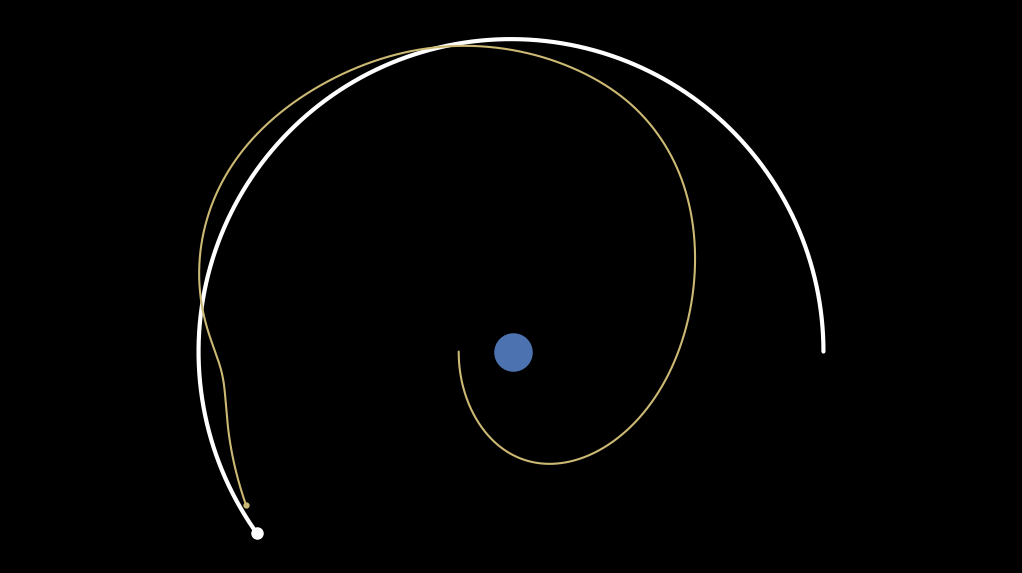

In [1]:
# This example imports data generated by the executable
from navigator import plot_navigator_trajectory

# This is the same as running the python script
plot_navigator_trajectory(datafile="/libsia/data/navigator.csv",
                          animate=True,
                          video_name="navigator-animated.mp4",
                          dpi=150,
                          fps=30,
                          clean_axes=True)